In [2]:
# Do homes with air conditioning have a higher sales price than homes without air conditioning?

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/chowd/Downloads/DS_-_homeprices.applied.econ.csv")
print(df)

        price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
0     42000.0     5850         3        1        2      yes      no      yes   
1     66000.0     3880         3        2        2      yes      no      yes   
2     83800.0     4800         3        1        1      yes     yes      yes   
3     45000.0     3986         2        2        1       no     yes      yes   
4     65900.0     4510         4        2        2      yes      no      yes   
..        ...      ...       ...      ...      ...      ...     ...      ...   
541   91500.0     4800         3        2        4      yes     yes       no   
542   94000.0     6000         3        2        4      yes      no       no   
543  103000.0     6000         3        2        4      yes     yes       no   
544  105000.0     6000         3        2        2      yes     yes       no   
545  105000.0     6000         3        1        2      yes      no       no   

    gashw airco  garagepl prefarea  
0 

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [7]:
# Split up the dataset
df_airco_yes = df[(df["airco"])== "yes"]
df_airco_yes.info()

df_airco_no = df[(df["airco"] == "no")]
df_airco_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     173 non-null    float64
 1   lotsize   173 non-null    int64  
 2   bedrooms  173 non-null    int64  
 3   bathrms   173 non-null    int64  
 4   stories   173 non-null    int64  
 5   driveway  173 non-null    object 
 6   recroom   173 non-null    object 
 7   fullbase  173 non-null    object 
 8   gashw     173 non-null    object 
 9   airco     173 non-null    object 
 10  garagepl  173 non-null    int64  
 11  prefarea  173 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     373 non-null    float64
 1   lotsize   373 non-null    int64  
 2   bedrooms  373 non-

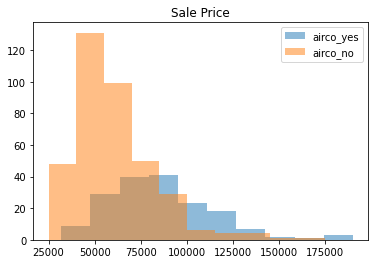

In [8]:
# Before running the t-test we'll check whether the samples are normally distributed
plt.hist(df_airco_yes['price'],alpha=0.5,label = "airco_yes")
plt.hist(df_airco_no['price'],alpha = 0.5, label = "airco_no")
plt.legend(loc  = "upper right")
plt.title("Sale Price")
plt.show()

In [9]:
print(stats.describe(df_airco_yes['price']))
print(stats.describe(df_airco_no['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


In [10]:
# Hence we can conclude the data is normally distributed and t-test can be applied to  it.

stats.ttest_ind(df_airco_yes['price'],df_airco_no['price'])

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

In [11]:
# Since the test statistic is greater than 1.96 and the p-value<0.05 we can reject the null hypothesis.


In [15]:
# Getting the confidence interval
import math
def get_95_ci(array_1,array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean-sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/ sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96*std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval(2-tail) is between" +str(ci_lower)+" and "+str(ci_upper)+".")
get_95_ci(df_airco_yes['price'],df_airco_no['price'])              

'The difference in means at the 95% confidence interval(2-tail) is between-30758.09492994282 and -21233.379166974857.'

In [16]:
# This implies that the price of houses without airconditioner is on an average lower than houses with an airconditioner by 21233 to 30758.

In [17]:
# Do homes with a full basement have a higher sales price than homes without a full basement?
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [19]:
# Splitting the data
df_fullbase_yes = df[(df['fullbase'] == 'yes')]
df_fullbase_yes.info()

df_fullbase_no = df[(df['fullbase'] == 'no')]
df_fullbase_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     191 non-null    float64
 1   lotsize   191 non-null    int64  
 2   bedrooms  191 non-null    int64  
 3   bathrms   191 non-null    int64  
 4   stories   191 non-null    int64  
 5   driveway  191 non-null    object 
 6   recroom   191 non-null    object 
 7   fullbase  191 non-null    object 
 8   gashw     191 non-null    object 
 9   airco     191 non-null    object 
 10  garagepl  191 non-null    int64  
 11  prefarea  191 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     355 non-null    float64
 1   lotsize   355 non-null    int64  
 2   bedrooms  355 non-

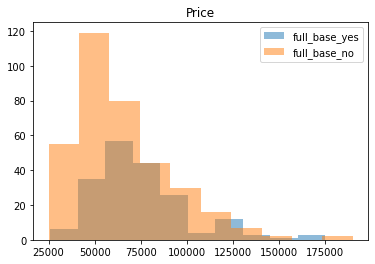

In [20]:
# Testing for normality of the data by plotting a histogram
plt.hist(df_fullbase_yes['price'],alpha = 0.5,label = "full_base_yes")
plt.hist(df_fullbase_no['price'],alpha = 0.5,label = "full_base_no")
plt.legend(loc  ="upper right")
plt.title("Price")
plt.show()

In [21]:
print(stats.describe(df_fullbase_yes['price']))
print(stats.describe(df_fullbase_no['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [22]:
# Hence we can conclude that the data is normally distributed and the t-test can be applied.


In [23]:
stats.ttest_ind(df_fullbase_yes['price'],df_fullbase_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [24]:
# The test statistic is greater than 1.96 and p value<0.05 hence the null hypothesis can be rejected.


In [25]:
def get_95_ci(array_1,array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean-sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/ sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96*std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval(2-tail) is between" +str(ci_lower)+" and "+str(ci_upper)+".")
get_95_ci(df_fullbase_yes['price'],df_fullbase_no['price'])

'The difference in means at the 95% confidence interval(2-tail) is between-15032.294775656886 and -5801.544262762097.'

In [26]:
# This implies that the price of houses without a full basement are on an average lower than prices of houses with a full basement by the amount 5801 to 15032.

[[Text(0, 0, 'fullbase_yes'), Text(1, 0, 'fullbase_no')]]

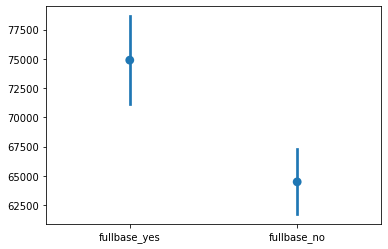

In [27]:
import seaborn as sns
g = sns.pointplot(data=[df_fullbase_yes['price'],df_fullbase_no['price']], join = False)
g.set(xticklabels=['fullbase_yes','fullbase_no'])